__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

Формула для парной регрессии:

$$y = b_0 + b_1 x$$

Т.к. у нас парная регрессия, воспользуемся формулами для нахождения коэффициентов:

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Формулы для нахождения коэффициентов для парной регрессии методом наименьших квадратов:  
Решаем систему уравнений: 
$$X \cdot b = y$$

$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$

Для такой задачи возможно записать аналитическое решение:

$$b = (X^\top X)^{-1} X^\top y.$$

In [41]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, 
# а затем с помощью метода наименьших квадратов.
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], float)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

salary_clear = salary
scoring_clear = scoring

b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

print(f'коэффициент b0 = {b0}')
print(f'коэффициент b1 = {b1}')

ox = salary
oy = b0 + b1 * salary

коэффициент b0 = 444.1773573243596
коэффициент b1 = 2.620538882402765


In [42]:
# Метод наименьших квадратов
ones_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
salary = np.vstack((ones_1, salary))
salary = salary.T
salary

XTX = salary.T.dot(salary)

np.linalg.det(XTX)

XTX_inv = np.linalg.inv(XTX)

scoring = scoring.reshape(-1, 1)

b = XTX_inv.dot(salary.T).dot(scoring)

print(b)

[[444.17735732]
 [  2.62053888]]


Коэффициенты найденые методом наименьших квадратов и через формулы парной регрессии совпадают.

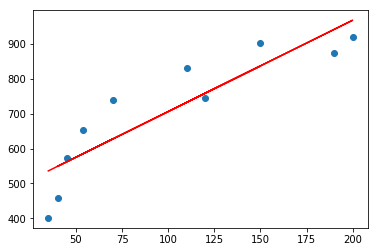

In [30]:
plt.scatter(salary_clear, scoring_clear);
plt.plot(ox, oy, color='red');

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

найдем дисперсию объясняемой переменной y и дисперсию модели можно посчитать следующим образом:

$$D_y = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n (y_i - \overline{y})^2, \:
D_{model} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n (z_i - \overline{z})^2.$$

Коэффициент детерминации тогда считается следующим образом:

$$R^2 = \dfrac{D_{model}}{D_y}.$$

Среднюю ошибку аппрокасимации считаем по формуле:  
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [51]:
z1 = b0 + b1 * salary_clear

R1 = z1.var() / scoring_clear.var()
print(f'R1 = {R1}')

def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

mean_approximation_error(scoring_clear, z1)


R1 = 0.7876386635293678


0.11469251843561709

В нашем случае, средняя ошибка аппроксимации составляет около 11%, можем сделать вывод что теоретические значения близки к тем, которые выдает модель линейной регрессии

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Выберем уровень значимости 0.05

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

вычислим критическое значение $F_{сrit} = F(k_1, k_2)$. Это же значение можно вычислить с помощью функции `scipy.stats.f.ppf`.

Если $T > F_{crit}$, то уравнение регрессии признаётся статистически значимым.

In [36]:
k1 = 1
k2 = 10

T1 = (R1 / (1 - R1)) * (k2 / k1)
print(f'T1 = {T1}')

from scipy import stats
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

T1 = 37.08955107458046


4.9646027437307145

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

#### 5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

Найдем стандартную ошибку коэффициента наклона: 
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

Допустим, мы получили коэффициент наклона $\hat{b}_1$ . Чтобы оценить значимость этого параметра, рассмотрим нулевую гипотезу $H_0$, которая утверждает, что реальное значение коэффициента $b_1$ равно 0.  Тогда статистика:

$$T = \dfrac{\hat{b}_1}{S_{slope}}$$
Зададим уровень значимости $\alpha$ = 0.05. Тогда критическая область выглядит следующим образом:

$$\Omega_\alpha = \left( -\infty, - t_{1 - \alpha/2, \: n - 2} \right) \cup \left( t_{1 - \alpha/2, \: n - 2}, \infty \right).$$

Если полученное нами значение $\hat{b}_1$ попадает в критическую область, то нулевая гипотеза (об отсутствии корреляции между значениями из $x$ и $y$) отвергается, откуда следует, что параметр $b_1$ является значимым.

Доверительный интервал для коэффициента $b_1$:

$$\left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope}, \: \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right).$$

Аналогично можно проверить значимость коэффициента сдвига $b_0$ и построить доверительный интервал для него. Стандартная ошибка коэффициента сдвига вычисляется по формуле:

$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [45]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

s_slope = standard_error_slope(salary_clear, scoring_clear, z1)
print(f's_slope = {s_slope}')

T = b1 / s_slope
print(f'T = {T}')

import scipy
from scipy import stats

p = 0.95
n = 10
t = scipy.stats.t.ppf((1 + p)/2, n-1)
print(f'Коэффициент Стьюдента = {t}')
print(f'Доверительный интервал для b1 {(b1 - t * s_slope, b1 + t * s_slope)}')

s_slope = 0.48108279568516005
T = 5.447168150485579
Коэффициент Стьюдента = 2.2621571627409915
Доверительный интервал для b1 (1.532253990272119, 3.7088237745334105)


Аналогично для параметра $b_0$:

In [46]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

s_intercept = standard_error_intercept(salary_clear, scoring_clear, z1)
print(f's_intercept = {s_intercept}')

T = b0 / s_intercept
print(f'T = {T}')

print(f'Доверительный интервал для b0 {(b0 - t * s_intercept, b0 + t * s_intercept)}')

s_intercept = 56.46649755068153
T = 7.866210524668863
Доверительный интервал для b0 (316.4412654351887, 571.9134492135305)


__Задача 2__

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Функция Лапласа:
$$F\left(t \right)=\frac{2}{\sqrt{2\pi }}\int_{0}^{t}{e^{-t^{2}/2}dt}$$

Функция нечетная , можно вычислять и значения от отрицательного аргумента по формуле:  
$$F\left(-t \right)=-F\left(t \right)$$

t-критерий стьтюдента находятся по формуле:
$$T = \dfrac{\overline{X} - m}{\sigma_X / \sqrt{n}},$$

t-критерий стьтюдента мы используем, когда известна выборочная дисперсия.
Функцию Лапласа когда она не известна.